## MLS WiSe 2025/26 Exercise 2b: Prediction of Student Degrees (33 Points)
*Adapted from an exercise created by Dennis Eisermann*

In this Jupyter notebook, you forecast the final degree ("G3") based on student activity. We examine a [data set](https://archive.ics.uci.edu/dataset/320/student%2Bperformance) of student achievements in secondary education at two Portuguese schools. The data elements include student grades, demographic, social, and school-related factors, which were collected through school reports and surveys. Two datasets provide the performance in two different subjects: mathematics (mat) and Portuguese language (por). 

### Setup

Install the necessary libraries to perform the following tasks.

In [1]:
%pip install -U numpy pandas matplotlib scikit-learn seaborn


  Using cached numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata (60 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\steve\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Task 1 – Preprocess the Dataset (4 Points)

Prepare the dataset for your subsequent usage. Download the nested [ZIP archive](https://archive.ics.uci.edu/static/public/320/student+performance.zip) containing the dataset.

1. Write code to load the two datasets `student-mat.csv` (Mathematics) and `student-por.csv` (Portuguese) with the appropriate separator and Print the result. (1P)

In [2]:
import zipfile, io, pandas as pd
outer_zip_path = 'data/student+performance.zip'

# Step 1: Open the outer ZIP
with zipfile.ZipFile(outer_zip_path, 'r') as outer_zip:
    # Step 2: Read the nested ZIP file into memory
    nested_zip_name = 'student.zip'  # adjust this to match the actual name
    with outer_zip.open(nested_zip_name) as nested_zip_file:
        nested_zip_bytes = io.BytesIO(nested_zip_file.read())

        # Step 3: Open the nested ZIP from memory
        with zipfile.ZipFile(nested_zip_bytes, 'r') as inner_zip:
            # Step 4: Read the CSV file inside the nested ZIP
            csv_name = 'student-mat.csv'
            with inner_zip.open(csv_name) as csv_file:
                df_math = pd.read_csv(csv_file, sep=";")
            csv_name = 'student-por.csv'
            with inner_zip.open(csv_name) as csv_file:
                df_port = pd.read_csv(csv_file, sep=";")

# Step 5: Use the DataFrame
print(df_math.head())
print(df_port.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

2. The results from the first and second period ("G1" and "G2") do not describe a student behavior appropriately. To not use them as features, remove intermediate period results from both datasets. (1P)

In [3]:
print(df_port.columns.tolist())
print(df_math.columns.tolist())

for df in (df_math, df_port) :
    df.drop(columns=['G1', 'G2'], inplace=True)
    print(df.columns.tolist())



['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
['school', 'sex', 'age', 'ad

3. Prepare datasets to analyze both courses together. Add the label "course" to both datasets. Concatenate both modified datasets to one new dataset. (1P)

In [4]:
df_math['course'] = 'math'
df_port['course'] = 'portugese'

df_combined = pd.concat([df_math, df_port], ignore_index=True)
print(df_combined)


     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      ... romantic famrel  freetime  go

4. The columns in all three datasets are labeled with abbreviations. Change this by labeling the columns of the dataset with the long names. Print the column names to verify the changed names. (1P)

In [5]:
for df in (df_port, df_math, df_combined) :
    print(df.columns.tolist())
    df.rename(columns={'Medu': 'mother_education', 'Fedu': 'father_education'}, inplace=True)
    print(df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'course']
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'mother_education', 'father_education', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'course']
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'course'

### Task 2 – Exploration of the Dataset (13 Points)

Explore the dataset to get a understanding of the contained data. The goal is to find possible correlations and biases in the measured data.

1. Calculate the correlation matrices between the features for all three datasets. Therefore, filter for the columns with "number" datatypes. As a preview, print the corelation matrix of the combined dataset. (1P)

In [6]:
numeric_df = df_port.select_dtypes(include='number')
correlation_matrix_port = numeric_df.corr()

numeric_df = df_math.select_dtypes(include='number')
correlation_matrix_math = numeric_df.corr()

numeric_df = df_combined.select_dtypes(include='number')
correlation_matrix_combined = numeric_df.corr()

print(type(correlation_matrix_combined))
print(correlation_matrix_combined)


<class 'pandas.core.frame.DataFrame'>
                       age  mother_education  father_education  traveltime  \
age               1.000000         -0.130196         -0.138521    0.049216   
mother_education -0.130196          1.000000          0.642063   -0.238181   
father_education -0.138521          0.642063          1.000000   -0.196328   
traveltime        0.049216         -0.238181         -0.196328    1.000000   
studytime        -0.007870          0.090616          0.033458   -0.081328   
failures          0.282364         -0.187769         -0.191390    0.087177   
famrel            0.007162          0.015004          0.013066   -0.012578   
freetime          0.002645          0.001054          0.002142   -0.007403   
goout             0.118510          0.025614          0.030075    0.049740   
Dalc              0.133453          0.001515         -0.000165    0.109423   
Walc              0.098291         -0.029331          0.019524    0.084292   
health           -0.029129

2. To increase the understanding of the data, take a look at the relation between the features.
Write a function to plot the correlation matrices as matplotlib figures. Use this function to show all three correlation matrices with appropriate labels.  (2P)

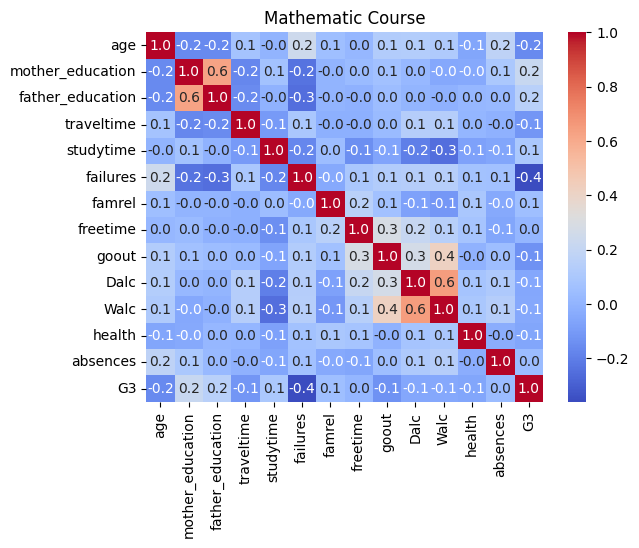

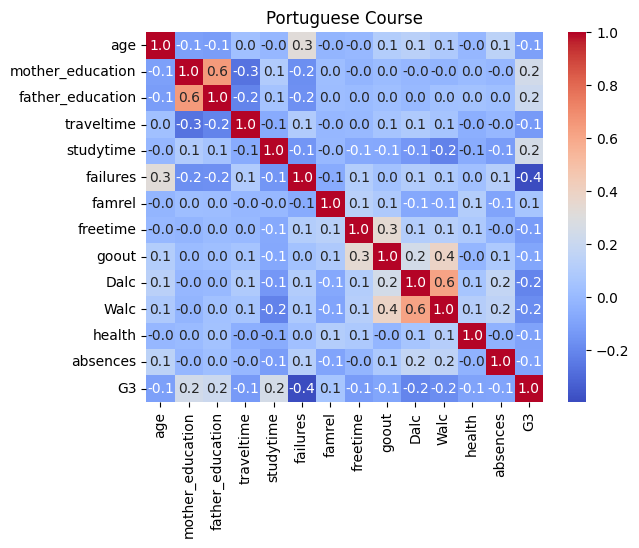

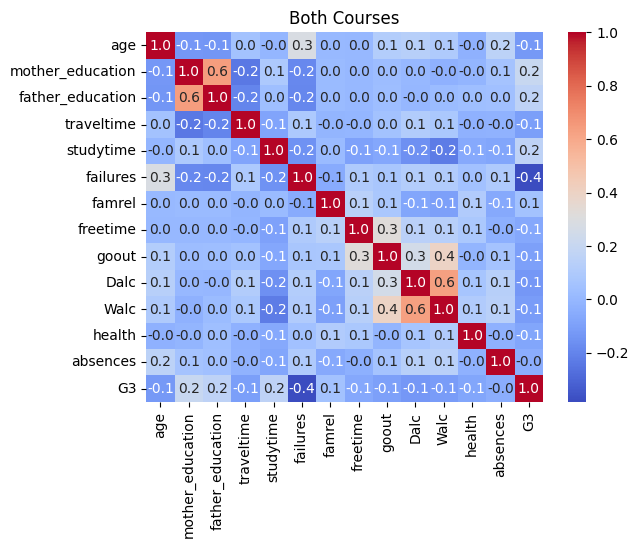

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_correlation(correlation,name:str):
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".1f")
    plt.title(name)
    plt.show()


plot_correlation(correlation_matrix_math, "Mathematic Course")
plot_correlation(correlation_matrix_port, "Portuguese Course")
plot_correlation(correlation_matrix_combined, "Both Courses")

3. Calculate the top 3 negative influences and print their labels and values. (1P)

In [8]:
corr_pairs = correlation_matrix_combined.stack()
 
# Diagonale (Selbstkorrelationen) entfernen
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
 
# Sortieren nach Wert
corr_sorted = corr_pairs.sort_values()
 
# Die 3 negativsten Werte
print(corr_sorted.head(6))

failures          G3                 -0.383145
G3                failures           -0.383145
traveltime        mother_education   -0.238181
mother_education  traveltime         -0.238181
Walc              studytime          -0.229073
studytime         Walc               -0.229073
dtype: float64


4. Interpret these correlations. Find and describe two possible reasons, e.g., social and learning psychology aspects, that may explain two of the three negative correlations. (2P)

Failures -> G3: number of previouly failed classes seems to be a good predictor for the fialure in the course. Possible reasons: Students who have failed before may have underlying issues such as lack of understanding, poor study habits, or external factors affecting their performance.

Walc -> studytime: Students who drink alcohol more frequently during the weekend may have less time and focus for studying, leading to lower academic performance.

5. Calculate the top 3 positive influences and print their labels and values. (1P)

In [9]:
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
 
# Sortieren nach Wert
corr_sorted = corr_pairs.sort_values(ascending=False)
 
# Die 3 negativsten Werte
print(corr_sorted.head(6))

mother_education  father_education    0.642063
father_education  mother_education    0.642063
Dalc              Walc                0.627814
Walc              Dalc                0.627814
                  goout               0.399794
goout             Walc                0.399794
dtype: float64


6. Interpret these correlations. Find and describe two possible reasons, e.g., social and learning psychology aspects, that may explain two of the three positive correlations. (2P)

Mother education -> Father education: Marriage is often based on similar social backgrounds and education levels, leading to a positive correlation between the education levels of mothers and fathers.
Dalc <-> Walc: Students who consume alcohol during weekdays may also be more likely to drink on weekends, indicating a general pattern of alcohol consumption.

7. Show the distribution of the final degree ("G3") regardless of gender as [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) and for female and male as [lineplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) in the same diagram. (2P)

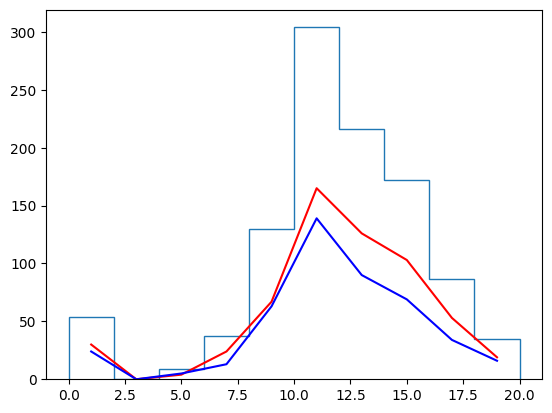

In [10]:
counts, bins = np.histogram(df_combined['G3'], bins=10)
counts_f, bins_f = np.histogram(df_combined[df_combined['sex'] == 'F']['G3'], bins=10, range=(0.0, 20.0))
bins_f += 1.0
counts_m, bins_m = np.histogram(df_combined[df_combined['sex'] == 'M']['G3'], bins=10, range=(0.0, 20.0))
bins_m += 1.0
plt.stairs(counts, bins)
plt.plot(bins_f[:10], counts_f, 'r')
plt.plot(bins_m[:10], counts_m, 'b')

8. What can you learn from this histogram about the data? Interpret the distributions and their semantics. (2P)

Overall there appear to be less male students than female students.Also on average the students achieve good grades in both courses. Feamle students seem to achieve slightly better grades than male students.

### Task 3 – Model Training and Evaluation (5 Points)

During this task, train a model to predict the final grades of the students from the features we explored above. Use the combined dataset from the previous tasks. 
Finally, calculate measures to evaluate the model quality.

1. Define which columns in the data to use as features and labels. Change the dataframe to use the "G3"/"final_grade" column as labels and the remaining columns as features. (1P)

In [11]:
# Define the label column
label_col = "G3"  # or "final_grade" depending on your dataset

# Separate features (X) and labels (y)
X = df_combined.drop(columns=[label_col])  # all columns except the label
y = df[label_col]                 # the label column


2. Split the dataset in a training and a test set using a 80/20 [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) split ratio. Use the value 42 as random state. (1P) 

In [16]:
from sklearn.model_selection import train_test_split


# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


3. Create the machine learning model to predict the final grade ("G3") based on the student behavior. Build a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and use [One Hot encoding](https://www.geeksforgeeks.org/ml-one-hot-encoding/) and the [GradientBoostingRegressor](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html) from sklearn. (2P)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor


#  Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(exclude=['object', 'category']).columns

#  Preprocessing: apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric features as they are
)

# Build the Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])



4. Fit the model with training data. Calculate the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) and the [r2 score](https://en.wikipedia.org/wiki/Coefficient_of_determination) of the model prediction for the test dataset. (1P)

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#  Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#  Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.46
R² Score: 0.27


### Task 4 – Model Usage and Interpretation (11 Points)

Use the model to predict student grades based on the features in the dataset and discuss the applicability of the model.

1. Create a fictive "good" and "bad" student in a separate dataframe. Print the features that you chose for both students in one table. (3P)<br>
*Note: Do not confuse the column names (short or long, see preprocessing) to avoid index errors.*

In [15]:
import numpy as np
import pandas as pd


2. Use your model to predict the final degree for the test dataset. Plot a figure with two overlaying histograms for predicted and ground truth final degree. (2P)

3. Describe two differences between the prediction and the original results in one sentence each. For each difference, explain its reason in one sentence. (3P)

*your answer*

4. List three arguments in favor or against the usage of the model. (3P)

*your answer*